In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## SVM

In [66]:
from sklearn.datasets import load_digits
from sklearn import svm

In [44]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


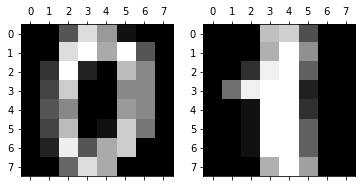

In [45]:
fig, ax = plt.subplots(1, 2)
plt.gray()
ax[0].matshow(digits.images[0])
ax[1].matshow(digits.images[1])
plt.show()

In [47]:
X = digits.data
y = digits.target

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [49]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [52]:
y_pred = svclassifier.predict(X_test)

In [55]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[72  0  0  0  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  0  0  2  0]
 [ 0  0 76  0  0  0  0  0  0  0]
 [ 0  0  0 76  0  3  0  0  3  0]
 [ 0  0  0  0 75  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  1]
 [ 0  0  0  0  0  0 68  0  1  0]
 [ 0  0  0  0  1  0  0 73  0  0]
 [ 0  3  0  0  1  1  1  0 62  0]
 [ 0  1  0  0  0  1  0  0  1 59]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       0.95      0.97      0.96        75
           2       1.00      1.00      1.00        76
           3       1.00      0.93      0.96        82
           4       0.97      1.00      0.99        75
           5       0.93      0.98      0.96        66
           6       0.99      0.99      0.99        69
           7       1.00      0.99      0.99        74
           8       0.90      0.91      0.91        68
           9       0.98      0.95      0.97        62

    accuracy                           0.97       719
   macro avg       

## KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
import imageio
from skimage.transform import resize

In [74]:
num_datos = 12500

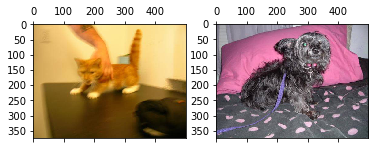

In [75]:
image1 = imageio.imread("./train/cat.0.jpg")
image2 = imageio.imread("./train/dog.0.jpg")
fig, ax = plt.subplots(1, 2)
plt.gray()
ax[0].matshow(image1)
ax[1].matshow(image2)
plt.show()

In [76]:
data = []

for i in range(0, num_datos):
    path = "./train/cat.X.jpg"
    path = path.replace("X", str(i))
    im = imageio.imread(path)
    im = resize(im, (128, 128)).flatten()
    data.append(im)

for i in range(0, num_datos):
    path = "./train/dog.X.jpg"
    path = path.replace("X", str(i))
    im = imageio.imread(path)
    im = resize(im, (128, 128)).flatten()
    data.append(im)

print(len(data))

25000


In [77]:
X = np.array(data)
y = ["cat"] * num_datos + ["dog"] * num_datos

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [78]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [79]:
y_pred = knn.predict(x_test)
print('Matriz de confusion')
print(confusion_matrix(y_test,y_pred))
print('Reporte de clasificacion')
print(classification_report(y_test,y_pred))

Matriz de confusion
[[874 368]
 [699 559]]
Reporte de clasificacion
              precision    recall  f1-score   support

         cat       0.56      0.70      0.62      1242
         dog       0.60      0.44      0.51      1258

    accuracy                           0.57      2500
   macro avg       0.58      0.57      0.57      2500
weighted avg       0.58      0.57      0.57      2500

